<a href="https://colab.research.google.com/github/ameliachoi/python-ml-guide/blob/main/learningspoons%2B02%2Bclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Classification 분류

## Classification list

* Logistic Regression
* Support Vector Machine
* Decision Tree
* Random Forest
* XGBoost
* LightGBM

## Evaluation 

* Accuracy
* Confusion Matrix
* ROC-AUC

---

In [1]:
import os
from os.path import join

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
cd '/content/drive/My Drive'

/content/drive/My Drive


In [3]:
train = join('Hospital', 'train.csv')
test = join('Hospital', 'test.csv')

data = pd.read_csv(train)
label = data['OC']

x_test = pd.read_csv(test)

In [4]:
data.head(3)

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,2.033835e+09,15652441.0,15236236.0,13236236.0,31641798.0,225169678.0,1.012700e+09,997671878.0,470055740.0,15027807.0,2.514586e+09,2.360684e+09,143449600.0,0.0,682825991.0,201323700.0,0.0,481502291.0,351000000.0,2.844460e+09,1.496394e+09,4.297848e+09,0.0,4.057422e+09,2.063787e+09,16194675.0,29983354.0,15683046.0,18808074.0,207829685.0,830169459.0,816570489.0,523702570.0,13598970.0,2.548115e+09,2.386263e+09,145898600.0,0.0,758993742.0,222876855.0,0.0,536116887.0,390000000.0,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,515483669.0,4.472197e+08,2.964023e+08,76156.0,30000.0,0.0,0.0,41864754.0,2.724421e+08,253682170.0,8095950.0,18759968.0,1.204810e+08,1.204810e+08,0.0,0.0,92414342.0,92414342.0,0.0,0.0,0.0,3.005088e+08,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,234.0,1.0,same


In [5]:
data.shape

(301, 58)

In [6]:
data.describe()

,inst_id,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
count,301.000000,301.000000,3.010000e+02,296.000000,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,291.000000,288.000000
mean,219.056478,81.039867,2.005013e+07,145.709459,1.288175e+10,2.014903e+09,1.033244e+10,5.654115e+09,2.696151e+08,5.115870e+08,1.868966e+08,7.847322e+07,2.101700e+08,3.536587e+09,3.414762e+09,6.975862e+08,1.154533e+08,1.140673e+10,1.053408e+10,3.406503e+08,2.516802e+05,8.765310e+09,4.352925e+09,1.758237e+09,4.583473e+09,2.646564e+09,5.938213e+09,1.265935e+09,1.170905e+10,1.842095e+09,9.203487e+09,5.023230e+09,2.223813e+08,5.617669e+08,1.736360e+08,6.832259e+07,2.563439e+08,3.222852e+09,3.106104e+09,6.103070e+08,1.063667e+08,1.045214e+10,9.651555e+09,3.232921e+08,2.226700e+05,8.146026e+09,3.860584e+09,1.510050e+09,4.471247e+09,2.709979e+09,5.273919e+09,9.786279e+08,142.546392,134.326389
std,121.234869,50.969714,8.893815e+04,118.923890,2.043543e+10,7.460271e+09,1.493886e+10,8.083343e+09,8.023701e+08,1.060379e+09,2.738658e+08,2.486102e+08,1.134673e+09,6.285995e+09,6.093581e+09,1.455332e+09,2.551702e+08,1.710516e+10,1.574525e+10,9.359381e+08,4.308072e+06,1.286112e+10,6.474262e+09,3.194540e+09,7.847530e+09,4.697523e+09,1.266035e+10,8.248321e+09,1.894998e+10,6.744178e+09,1.352567e+10,7.406530e+09,5.274637e+08,1.121856e+09,2.693894e+08,2.428512e+08,1.111963e+09,6.015755e+09,5.823176e+09,1.455249e+09,2.490099e+08,1.649538e+10,1.521792e+10,8.784355e+08,3.811496e+06,1.255800e+10,6.797242e+09,2.953412e+09,7.659580e+09,4.564001e+09,1.081259e+10,4.688798e+09,160.191073,151.061786
min,1.000000,1.000000,1.978012e+07,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.696701e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.019624e+10,-2.914970e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.064823e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.014780e+10,-2.781507e+09,0.000000,0.000000
25%,112.000000,37.000000,2.001102e+07,52.750000,3.252112e+09,0.000000e+00,2.758201e+09,1.626053e+09,8.217133e+06,8.013395e+07,5.066474e+07,0.000000e+00,-2.168279e+06,7.199253e+08,6.806512e+08,0.000000e+00,4.177116e+06,2.900012e+09,2.700124e+09,9.680000e+05,0.000000e+00,1.953077e+09,5.110121e+08,0.000000e+00,4.285000e+08,0.000000e+00,1.224795e+09,0.000000e+00,2.731342e+09,0.000000e+00,2.253260e+09,1.347918e+09,6.453360e+06,6.473168e+07,3.142969e+07,0.000000e+00,0.000000e+00,4.703623e+08,4.526867e+08,0.000000e+00,2.054789e+06,2.479446e+09,2.338407e+09,0.000000e+00,0.000000e+00,1.283220e+09,2.855741e+08,0.000000e+00,2.557878e+07,0.000000e+00,1.017573e+09,0.000000e+00,5

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             301 non-null    int64  
 1   OC                  301 non-null    object 
 2   sido                301 non-null    object 
 3   sgg                 301 non-null    int64  
 4   openDate            301 non-null    int64  
 5   bedCount            296 non-null    float64
 6   instkind            300 non-null    object 
 7   revenue1            293 non-null    float64
 8   salescost1          293 non-null    float64
 9   sga1                293 non-null    float64
 10  salary1             293 non-null    float64
 11  noi1                293 non-null    float64
 12  noe1                293 non-null    float64
 13  interest1           293 non-null    float64
 14  ctax1               293 non-null    float64
 15  profit1             293 non-null    float64
 16  liquidAs

In [8]:
x_test.head(3)

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,2,NaN,incheon,139,19981125.0,300.0,general_hospital,6.682486e+10,0.000000e+00,6.565709e+10,3.223695e+10,4.314093e+09,4.901517e+09,1.775872e+09,76680000.0,5.036692e+08,2.591385e+10,2.438741e+10,7.242580e+08,1.526434e+09,4.807282e+10,4.629931e+10,746312240.0,0.0,6.769090e+10,5.426088e+10,3.805927e+10,1.343002e+10,6.319097e+09,6.295769e+09,8.944587e+09,6.360375e+10,0.000000e+00,6.261126e+10,3.016946e+10,4.076448e+09,4.332357e+09,1.578626e+09,218399804.0,5.181821e+08,2.498992e+10,2.367928e+10,1.237754e+09,1.310637e+09,4.650191e+10,4.356296e+10,796386240.0,0.0,5.540643e+10,5.068443e+10,3.714334e+10,4.720000e+09,4.690000e+09,1.608540e+10,8.944587e+09,693,693,same
1,5,NaN,jeju,149,20160309.0,44.0,hospital,3.495758e+10,0.000000e+00,3.259270e+10,1.672254e+10,6.871024e+07,1.981033e+09,1.936455e+09,0.0,4.525557e+08,5.861727e+09,5.372198e+09,6.610290e+08,4.895291e+08,7.511010e+10,6.678648e+10,4500000.0,0.0,6.626737e+10,4.210945e+10,2.330000e+10,2.415791e+10,1.720000e+10,1.470447e+10,1.046277e+10,3.754253e+10,0.000000e+00,3.868523e+10,1.897732e+10,1.918022e+08,3.694365e+09,2.016114e+09,0.0,-4.645265e+09,5.503720e+09,4.943368e+09,1.544307e+08,5.603519e+08,6.559379e+10,6.545302e+10,14500000.0,0.0,6.730838e+10,4.209828e+10,2.420000e+10,2.521009e+10,1.830000e+10,3.789135e+09,0.000000e+00,379,371,same
2,6,NaN,jeonnam,103,19890427.0,276.0,general_hospital,2.326031e+10,2.542571e+09,2.308749e+10,1.168734e+10,1.601943e+09,1.380941e+09,8.101204e+08,0.0,-2.148749e+09,1.265313e+10,1.133922e+10,7.337107e+09,1.313914e+09,2.945467e+10,2.830632e+10,138806980.0,0.0,0.000000e+00,2.830632e+10,2.182278e+10,0.000000e+00,0.000000e+00,0.000000e+00,1.638540e+10,2.468035e+10,1.500100e+09,2.373950e+10,1.191146e+10,2.361216e+08,1.328858e+09,6.259234e+08,15210270.0,-1.667198e+09,1.354202e+10,1.263851e+10,7.003703e+09,9.035036e+08,2.938810e+10,2.777589e+10,428850980.0,0.0,0.000000e+00,2.777589e+10,2.182278e+10,0.000000e+00,0.000000e+00,0.000000e+00,1.638540e+10,NaN,NaN,NaN


In [9]:
x_test.shape

(127, 58)

In [10]:
x_test.describe()

,inst_id,OC,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2
count,127.000000,0.0,127.000000,1.260000e+02,119.000000,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02
mean,205.905512,NaN,95.858268,2.005085e+07,172.789916,1.824446e+10,3.973321e+09,1.340410e+10,7.415084e+09,5.175513e+08,8.704307e+08,3.168253e+08,1.148616e+08,3.940712e+08,4.418038e+09,4.232245e+09,8.704763e+08,1.783786e+08,1.605153e+10,1.489646e+10,4.048877e+08,2.624457e+06,1.337752e+10,6.851130e+09,2.927576e+09,6.761562e+09,4.204390e+09,6.731170e+09,1.985867e+09,1.666478e+10,3.642247e+09,1.210407e+10,6.631639e+09,4.336847e+08,7.870283e+08,3.233951e+08,8.150882e+07,4.871806e+08,4.111472e+09,3.934688e+09,6.883923e+08,1.674086e+08,1.427785e+10,1.336209e+10,3.513831e+08,1.973114e+04,1.189851e+10,5.633432e+09,2.181713e+09,6.495026e+09,4.482682e+09,6.116179e+09,1.648474e+09
std,131.801765,NaN,52.684253,8.795815e+04,126.024471,3.133530e+10,1.419948e+10,2.054481e+10,1.210043e+10,1.193139e+09,1.804461e+09,4.587781e+08,3.089796e+08,1.813462e+09,7.521406e+09,7.273518e+09,2.227549e+09,3.186423e+08,2.237239e+10,2.111618e+10,1.060221e+09,2.910307e+07,2.016542e+10,1.147520e+10,5.627846e+09,1.090707e+10,5.889709e+09,1.026399e+10,5.569804e+09,2.916019e+10,1.301466e+10,1.917779e+10,1.120355e+10,1.044751e+09,1.691778e+09,5.538490e+08,2.236581e+08,1.698042e+09,7.741020e+09,7.462307e+09,1.857911e+09,3.049884e+08,2.178418e+10,2.085404e+10,9.791097e+08,2.206009e+05,1.971182e+10,9.662048e+09,4.952449e+09,1.203673e+10,7.517020e+09,9.813461e+09,4.779444e+09
min,2.000000,NaN,6.000000,1.976041e+07,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.734451e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.821590e+09,-8.636718e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.645265e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.955957e+09,-8.600000e+09
25%,89.000000,NaN,51.000000,2.000083e+07,94.000000,3.235889e+09,0.000000e+00,3.083860e+09,1.666742e+09,1.641094e+07,8.365552e+07,5.259163e+07,0.000000e+00,1.060223e+07,8.207361e+08,7.549205e+08,1.235600e+06,1.245000e+06,4.569689e+09,4.236534e+09,4.900000e+06,0.000000e+00,2.174968e+09,5.770697e+08,0.000000e+00,8.500000e+08,4.000000e+08,1.735156e+09,0.000000e+00,2.968797e+09,0.000000e+00,2.664096e+09,1.364296e+09,1.038145e+07,5.293872e+07,3.976694e+07,0.000000e+00,0.000000e+00,3.877786e+08,3.856864e+08,0.000000e+00,0.000000e+00,2.857353e+09,2.807763e+09,0.000000e+00,0.000000e+00,1.679896e+09,3.914156e+08,0.000000e+00,1.321368e+08,0.000000e+00,9.492656e+08,0.000000e+00
50%,199.000000,NaN,95.000000,2.007107e+07,156.000000,6.637116e+09,1.896923e+08,5.716

In [11]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             127 non-null    int64  
 1   OC                  0 non-null      float64
 2   sido                127 non-null    object 
 3   sgg                 127 non-null    int64  
 4   openDate            126 non-null    float64
 5   bedCount            119 non-null    float64
 6   instkind            125 non-null    object 
 7   revenue1            125 non-null    float64
 8   salescost1          125 non-null    float64
 9   sga1                125 non-null    float64
 10  salary1             125 non-null    float64
 11  noi1                125 non-null    float64
 12  noe1                125 non-null    float64
 13  interest1           125 non-null    float64
 14  ctax1               125 non-null    float64
 15  profit1             125 non-null    float64
 16  liquidAs

#### 데이터 정보

    train.csv - 의료기관이 폐업했는지 여부를 포함하여 최근 2개년의 재무정보와 병원 기본정보 
    test.csv - 폐업 여부를 제외하고 train.csv와 동일 
    sample_submission.csv - inst_id와 open과 close를 예측하는 OC 두개의 열로 구성. OC의 값은 open 예측일 경우 1, close 예측일 경우 0.



    inst_id - 각 파일에서의 병원 고유 번호
    OC – 영업/폐업 분류, 2018년 폐업은 2017년 폐업으로 간주함
    sido – 병원의 광역 지역 정보
    sgg – 병원의 시군구 자료
    openDate – 병원 설립일
    bedCount - 병원이 갖추고 있는 병상의 수
    instkind – 병원, 의원, 요양병원, 한의원, 종합병원 등 병원의 종류
    ·        종합병원 : 입원환자 100명 이상 수용 가능
    ·        병원 : 입원 환자 30명 이상 100명 미만 수용 가능
    ·        의원 : 입원 환자 30명 이하 수용 가능
    ·        한방 병원(한의원) : 침술과 한약으로 치료하는 의료 기관.  
    revenue1 – 매출액, 2017(회계년도)년 데이터를 의미함
    salescost1 – 매출원가, 2017(회계년도)년 데이터를 의미함
    sga1 - 판매비와 관리비, 2017(회계년도)년 데이터를 의미함
    salary1 – 급여, 2017(회계년도)년 데이터를 의미함
    noi1 – 영업외수익, 2017(회계년도)년 데이터를 의미함
    noe1 – 영업외비용, 2017(회계년도)년 데이터를 의미함
    Interest1 – 이자비용, 2017(회계년도)년 데이터를 의미함
    ctax1 – 법인세비용, 2017(회계년도)년 데이터를 의미함
    Profit1 – 당기순이익, 2017(회계년도)년 데이터를 의미함
    liquidAsset1 – 유동자산, 2017(회계년도)년 데이터를 의미함
    quickAsset1 – 당좌자산, 2017(회계년도)년 데이터를 의미함
    receivableS1 - 미수금(단기), 2017(회계년도)년 데이터를 의미함
    inventoryAsset1 – 재고자산, 2017(회계년도)년 데이터를 의미함
    nonCAsset1 – 비유동자산, 2017(회계년도)년 데이터를 의미함
    tanAsset1 – 유형자산, 2017(회계년도)년 데이터를 의미함
    OnonCAsset1 - 기타 비유동자산, 2017(회계년도)년 데이터를 의미함
    receivableL1 – 장기미수금, 2017(회계년도)년 데이터를 의미함
    debt1 – 부채총계, 2017(회계년도)년 데이터를 의미함
    liquidLiabilities1 – 유동부채, 2017(회계년도)년 데이터를 의미함
    shortLoan1 – 단기차입금, 2017(회계년도)년 데이터를 의미함
    NCLiabilities1 – 비유동부채, 2017(회계년도)년 데이터를 의미함
    longLoan1 – 장기차입금, 2017(회계년도)년 데이터를 의미함
    netAsset1 – 순자산총계, 2017(회계년도)년 데이터를 의미함
    surplus1 – 이익잉여금, 2017(회계년도)년 데이터를 의미함
    revenue2 – 매출액, 2016(회계년도)년 데이터를 의미함
    salescost2 – 매출원가, 2016(회계년도)년 데이터를 의미함
    sga2 - 판매비와 관리비, 2016(회계년도)년 데이터를 의미함
    salary2 – 급여, 2016(회계년도)년 데이터를 의미함
    noi2 – 영업외수익, 2016(회계년도)년 데이터를 의미함
    noe2 – 영업외비용, 2016(회계년도)년 데이터를 의미함
    interest2 – 이자비용, 2016(회계년도)년 데이터를 의미함
    ctax2 – 법인세비용, 2016(회계년도)년 데이터를 의미함
    profit2 – 당기순이익, 2016(회계년도)년 데이터를 의미함
    liquidAsset2 – 유동자산, 2016(회계년도)년 데이터를 의미함
    quickAsset2 – 당좌자산, 2016(회계년도)년 데이터를 의미함
    receivableS2 - 미수금(단기), 2016(회계년도)년 데이터를 의미함
    inventoryAsset2 – 재고자산, 2016(회계년도)년 데이터를 의미함
    nonCAsset2 – 비유동자산, 2016(회계년도)년 데이터를 의미함
    tanAsset2 – 유형자산, 2016(회계년도)년 데이터를 의미함
    OnonCAsset2 - 기타 비유동자산, 2016(회계년도)년 데이터를 의미함
    receivableL2 – 장기미수금, 2016(회계년도)년 데이터를 의미함
    Debt2 – 부채총계, 2016(회계년도)년 데이터를 의미함
    liquidLiabilities2 – 유동부채, 2016(회계년도)년 데이터를 의미함
    shortLoan2 – 단기차입금, 2016(회계년도)년 데이터를 의미함
    NCLiabilities2 – 비유동부채, 2016(회계년도)년 데이터를 의미함
    longLoan2 – 장기차입금, 2016(회계년도)년 데이터를 의미함
    netAsset2 – 순자산총계, 2016(회계년도)년 데이터를 의미함
    surplus2 – 이익잉여금, 2016(회계년도)년 데이터를 의미함
    employee1 – 고용한 총 직원의 수, 2017(회계년도)년 데이터를 의미함
    employee2 – 고용한 총 직원의 수, 2016(회계년도)년 데이터를 의미함
    ownerChange – 대표자의 변동 

* x_test 데이터에서 `employee1`, `employee2`가 실제로는 실수형이지만 범주형 변수로 기록되어 있음. 실수형으로 자료 변환이 필요함.

In [12]:
# 발생한 에러 처리
# x의 타입이 str이면 ,를 .으로 변환하고 아니면 x값 그대로 반환
x_test['employee1'] = x_test['employee1'].map(lambda x: x.replace(',', '.') if isinstance(x, str) else x)
x_test['employee2'] = x_test['employee2'].map(lambda x: x.replace(',', '.') if isinstance(x, str) else x)

# 자료형 변경
x_test['employee1'] = x_test['employee1'].astype(np.float64)
x_test['employee2'] = x_test['employee2'].astype(np.float64)

#### 클래스 분포 확인

In [13]:
label.value_counts()

open      286
 close     15
Name: OC, dtype: int64

* 상당히 불균형한 값으로 분포되어 있음. 이런 데이터셋의 경우, Open으로 예측할 시 거의 정확도가 95% 정도로 나옴.

#### 불필요한 컬럼 삭제
* `openDate`는 병원 개업 년월일로, 현재 강의에서는 중요치 않아서 삭제
* 실제로 년월일 데이터는 범주형 변수로 만들어 전처리 진행

In [14]:
data.drop(columns=['OC', 'inst_id', 'openDate'], inplace=True)
x_test.drop(columns=['OC', 'inst_id', 'openDate'], inplace=True)

#### 수치/범주형 변수 컬럼

In [15]:
cat_columns = ['sido', 'instkind', 'ownerChange']
num_columns = [c for c in data.columns if c not in cat_columns]
print('Categorical Columns: \n{}n\n Numeric Columns: \n{}\n'.format(cat_columns,
                                                                    num_columns))

Categorical Columns: 
['sido', 'instkind', 'ownerChange']n
 Numeric Columns: 
['sgg', 'bedCount', 'revenue1', 'salescost1', 'sga1', 'salary1', 'noi1', 'noe1', 'interest1', 'ctax1', 'profit1', 'liquidAsset1', 'quickAsset1', 'receivableS1', 'inventoryAsset1', 'nonCAsset1', 'tanAsset1', 'OnonCAsset1', 'receivableL1', 'debt1', 'liquidLiabilities1', 'shortLoan1', 'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1', 'revenue2', 'salescost2', 'sga2', 'salary2', 'noi2', 'noe2', 'interest2', 'ctax2', 'profit2', 'liquidAsset2', 'quickAsset2', 'receivableS2', 'inventoryAsset2', 'nonCAsset2', 'tanAsset2', 'OnonCAsset2', 'receivableL2', 'debt2', 'liquidLiabilities2', 'shortLoan2', 'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2', 'employee1', 'employee2']



#### 결측치 확인

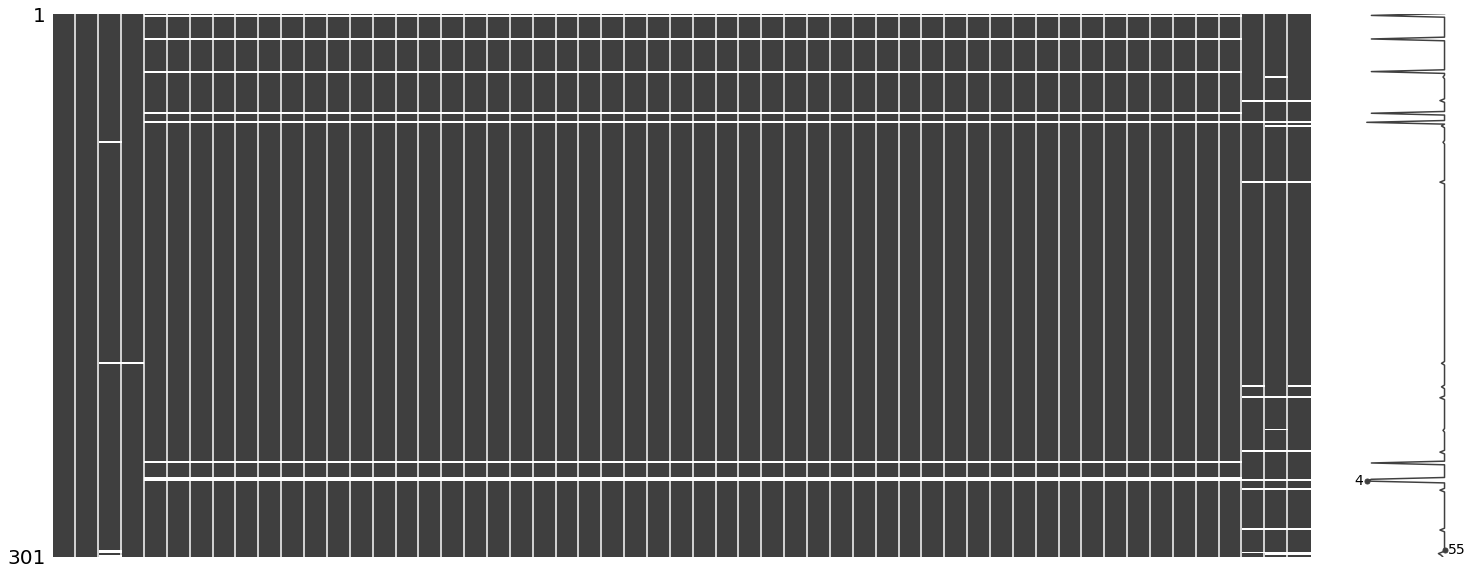

In [16]:
import missingno as msno
msno.matrix(data)

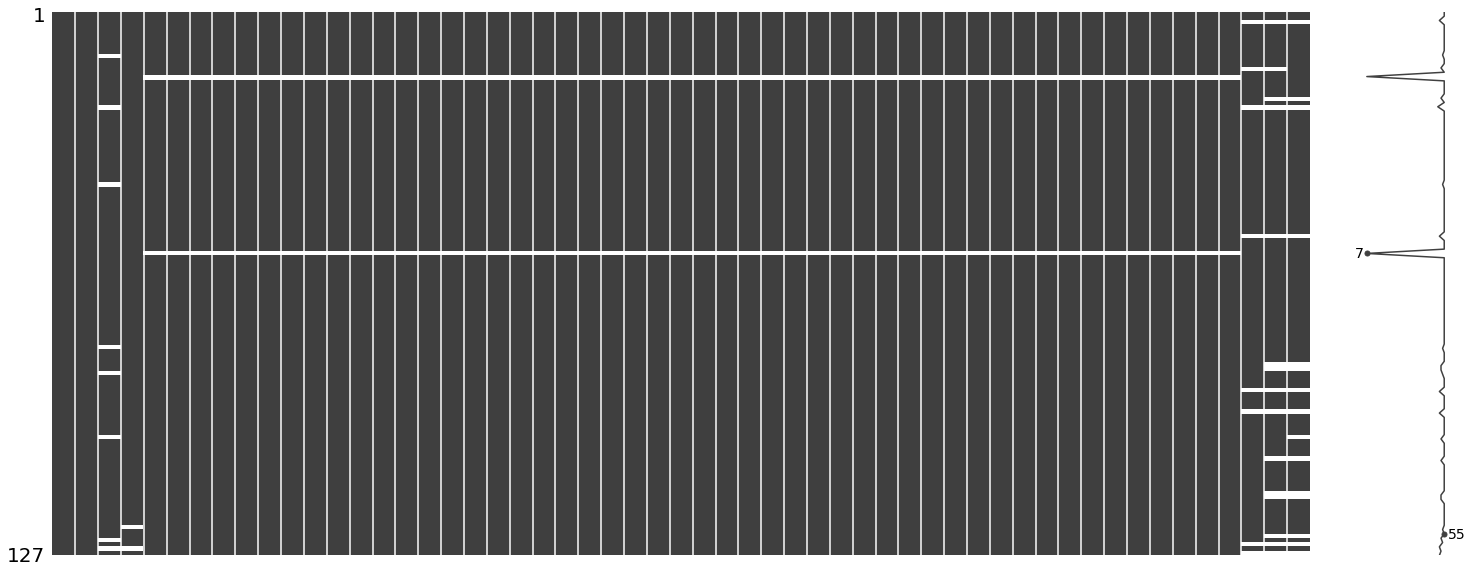

In [17]:
msno.matrix(x_test)

In [18]:
# 수치형 변수들의 결측치 확인
pd.isna(data[num_columns]).sum()

sgg                    0
bedCount               5
revenue1               8
salescost1             8
sga1                   8
salary1                8
noi1                   8
noe1                   8
interest1              8
ctax1                  8
profit1                8
liquidAsset1           8
quickAsset1            8
receivableS1           8
inventoryAsset1        8
nonCAsset1             8
tanAsset1              8
OnonCAsset1            8
receivableL1           8
debt1                  8
liquidLiabilities1     8
shortLoan1             8
NCLiabilities1         8
longLoan1              8
netAsset1              8
surplus1               8
revenue2               8
salescost2             8
sga2                   8
salary2                8
noi2                   8
noe2                   8
interest2              8
ctax2                  8
profit2                8
liquidAsset2           8
quickAsset2            8
receivableS2           8
inventoryAsset2        8
nonCAsset2             8


In [19]:
pd.isna(x_test[cat_columns]).sum()

sido            0
instkind        2
ownerChange    15
dtype: int64

#### train/valid set 분리

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(data, label,
                                                      test_size=.3,
                                                      random_state=1995,
                                                      shuffle=True,
                                                      stratify=label)

In [21]:
### 쪼갠 데이터의 인덱스는 정리해주는 것이 좋음. pd.concat 연산 시, 인덱스를 기준으로 연결하기 때문 ###
### drop 인자를 True로 주지 않으면, 이전 인덱스가 새로운 변수로 생성됨 ###
x_train.reset_index(drop=True, inplace=True)
x_valid.reset_index(drop=True, inplace=True)

#### 결측치 처리

In [22]:
x_train_mean = np.mean(x_train[num_columns], axis=0)
x_train_mode = x_train[cat_columns].mode()

In [23]:
print(x_train_mean)
print(x_train_mode)

sgg                   8.128571e+01
bedCount              1.443592e+02
revenue1              1.287304e+10
salescost1            1.953440e+09
sga1                  1.038558e+10
salary1               5.861932e+09
noi1                  2.961822e+08
noe1                  5.700076e+08
interest1             1.884271e+08
ctax1                 8.128681e+07
profit1               1.755130e+08
liquidAsset1          3.498238e+09
quickAsset1           3.375706e+09
receivableS1          7.111422e+08
inventoryAsset1       1.146186e+08
nonCAsset1            1.189598e+10
tanAsset1             1.099368e+10
OnonCAsset1           3.145614e+08
receivableL1          3.614819e+05
debt1                 9.156195e+09
liquidLiabilities1    4.282422e+09
shortLoan1            1.540234e+09
NCLiabilities1        5.119478e+09
longLoan1             2.876318e+09
netAsset1             5.893616e+09
surplus1              1.493136e+09
revenue2              1.162711e+10
salescost2            1.796232e+09
sga2                

In [24]:
for c in num_columns:
  x_train.loc[pd.isna(x_train[c]), c] = x_train_mean[c]
  x_valid.loc[pd.isna(x_valid[c]), c] = x_train_mean[c]
  x_test.loc[pd.isna(x_test[c]), c] = x_train_mean[c]

for c in cat_columns:
  x_train.loc[pd.isna(x_train[c]), c] = x_train_mode[c][0]
  x_valid.loc[pd.isna(x_valid[c]), c] = x_train_mode[c][0]
  x_test.loc[pd.isna(x_test[c]), c] = x_train_mode[c][0]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [25]:
pd.isna(x_train).sum().sum(), pd.isna(x_valid).sum().sum(), pd.isna(x_test).sum().sum()

(0, 0, 0)

#### Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train[num_columns])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
x_train[num_columns] = scaler.transform(x_train[num_columns])
x_valid[num_columns] = scaler.transform(x_valid[num_columns])
x_test[num_columns] = scaler.transform(x_test[num_columns])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [28]:
x_train[num_columns].describe()

,sgg,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,-1.480297e-16,-9.674801e-17,-2.643388e-18,2.194012e-17,-1.247679e-16,-1.268826e-17,2.352615e-17,2.643388e-17,4.969570e-17,2.564087e-17,1.334911e-17,5.577549e-17,-8.458842e-18,7.533656e-17,-2.616954e-17,-5.498247e-17,2.167578e-17,1.033565e-16,7.831037e-17,-4.229421e-18,-1.073216e-16,-5.762586e-17,-8.802483e-17,5.286776e-19,8.300239e-17,7.586524e-17,3.753611e-17,-2.934161e-17,-1.744636e-17,-5.498247e-17,1.850372e-18,6.819941e-17,-1.210672e-16,-5.789020e-17,5.286776e-19,-9.251859e-17,6.317698e-17,3.357103e-17,-5.286776e-19,-2.616954e-17,-5.445380e-17,-5.418946e-17,8.723181e-17,3.172066e-18,1.152517e-16,1.993115e-16,-2.643388e-19,1.268826e-17,9.859838e-17,-1.321694e-19,3.013462e-17,-1.586033e-17
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.509615e+00,-1.262887e+00,-6.428746e-01,-3.786791e-01,-6.623675e-01,-6.685371e-01,-3.263199e-01,-4.759130e-01,-6.724801e-01,-3.214715e-01,-3.969358e+00,-6.146304e-01,-6.112829e-01,-4.428544e-01,-4.694654e-01,-6.289560e-01,-6.345026e-01,-3.471646e-01,-7.121091e-02,-6.678901e-01,-6.702362e-01,-5.393309e-01,-5.875300e-01,-5.697070e-01,-1.857175e+00,-4.582562e-01,-6.273878e-01,-3.666031e-01,-6.544370e-01,-6.499843e-01,-4.212060e-01,-4.912283e-01,-6.335045e-01,-2.711889e-01,-3.687116e+00,-5.871842e-01,-5.834483e-01,-4.595692e-01,-4.454101e-01,-6.063457e-01,-6.073836e-01,-3.615628e-01,-7.121091e-02,-6.438853e-01,-5.597222e-01,-5.351147e-01,-5.835143e-01,-5.930813e-01,-2.149359e+00,-7.312986e-01,-8.531250e-01,-8.461909e-01
25%,-9.079177e-01,-8.057923e-01,-4.775009e-01,-3.786791e-01,-4.806652e-01,-4.793666e-01,-3.168106e-01,-4.130308e-01,-4.847251e-01,-3.214715e-01,-1.488772e-01,-4.794721e-01,-4.795092e-01,-4.428414e-01,-4.450707e-01,-4.708965e-01,-4.819133e-01,-3.463016e-01,-7.121091e-02,-5.284174e-01,-5.893728e-01,-5.393309e-01,-5.368331e-01,-5.697070e-01,-3.365717e-01,-1.552229e-01,-4.770869e-01,-3.666031e-01,-4.929979e-01,-4.792494e-01,-4.059118e-01,-4.387823e-01,-5.123527e-01,-2.711889e-01,-2.029987e-01,-4.950699e-01,-4.938971e-01,-4.595692e-01,-4.332738e-01,-4.667732e-01,-4.670676e-01,-3.615628e-01,-7.121091e-02,-5.385473e-01,-5.158125e-01,-5.351147e-01,-5.749607e-01,-5.930813e

In [29]:
x_valid[num_columns].describe()

,sgg,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,9.100000e+01,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,-0.015290,0.038422,0.001400,0.038363,-0.010912,-0.076312,-0.094244,-0.157050,-0.017587,-0.035827,0.090910,0.021694,0.022772,-0.027181,0.011008,-0.083287,-0.085407,0.092707,-6.964584e-02,-0.091805,0.035528,0.245786,-0.198061,-0.146523,0.010221,-0.076049,0.014237,0.030139,0.011377,-0.055140,-0.055443,-0.125527,0.010691,0.053756,0.053847,0.033312,0.031204,0.115147,-0.015032,-0.099144,-0.090575,-0.009370,-0.069646,-0.104757,-0.017830,0.156924,-0.180766,-0.106985,0.011290,-0.102650,-0.095685,-0.054005
std,0.853331,1.101554,1.022617,2.109810,0.782155,0.648041,0.442660,0.438786,0.875172,0.895607,0.658327,1.274287,1.271497,0.575331,1.100278,0.561628,0.583845,1.059442,1.049819e-02,0.718515,0.998481,1.297789,0.520473,0.678539,0.549249,0.219455,1.028963,1.952708,0.836796,0.699673,0.802167,0.549556,0.913066,1.030493,0.782264,1.304596,1.295304,1.477626,1.058569,0.580238,0.606094,0.864750,0.010498,0.735425,0.869126,1.371201,0.540317,0.736918,0.622032,0.356697,0.646466,0.661156
min,-1.472009,-1.262887,-0.624369,-0.378679,-0.662368,-0.668537,-0.326320,-0.475913,-0.672480,-0.321471,-1.742372,-0.614630,-0.611283,-0.442854,-0.469465,-0.628956,-0.634503,-0.347165,-7.121091e-02,-0.667890,-0.670236,-0.539331,-0.587530,-0.569707,-0.419530,-0.232614,-0.627388,-0.366603,-0.654437,-0.649984,-0.421206,-0.491228,-0.633504,-0.271189,-2.488095,-0.587184,-0.583448,-0.459569,-0.445410,-0.606346,-0.607384,-0.361563,-0.071211,-0.643885,-0.559722,-0.535115,-0.583514,-0.593081,-0.443121,-0.308209,-0.847350,-0.840018
25%,-0.785698,-0.737994,-0.479487,-0.378679,-0.478575,-0.482351,-0.317418,-0.400810,-0.523484,-0.321471,-0.137152,-0.488824,-0.482094,-0.442780,-0.453980,-0.450611,-0.462920,-0.344908,-7.121091e-02,-0.509360,-0.578057,-0.539331,-0.522730,-0.569707,-0.307914,-0.155223,-0.475639,-0.366603,-0.478981,-0.469118,-0.410614,-0.430501,-0.523910,-0.271189,-0.197053,-0.518089,-0.518203,-0.459569,-0.439236,-0.459478,-0.448047,-0.361563,-0.071211,-0.546395,-0.523882,-0.535115,-0.581845,-0.593081,-0.345136,-0.213914,-0.541276,-0.482015
50%,-0.042978,-0.073128,-0.376250,-0.348624,-0.363628,-0.348590,-0.275202,-0.327176,-0.290673,-0.307020,-0.038182,-0.295096,-0.284027,-0.296525,-0.361364,-0.268070,-0.255106,-0.302849,-7.121091e-02,-0.355148,-0.404798,-0.276710,-0.371751,-0.393426,-0.166974,-0.155223,-0.353465,-0.337150,-0.330806,-0.320927,-0.351274,-0.343339,-0.282183,-0.262449,-0.113965,-0.328067,-0.326686,-0.365386,-0.365434,-0.302552,-0.299839,-0.332879,-0.071211,-0.371432,-0.375532,-0.435522,-0.392440,-0.382360,-0.197158,-0.213914,-0.362251,-0.303013
75%,0.624529,0.320542,0.072392,-0.208040,0.101700,0.104299,-0.056633,-0.097276,0.166553,-0.157408,0.096151,-0.010469,-0.012118,0.200399,-0.019235,0.148995,0.120618,-0.062978,-7.121091e-02,0.062731,0.164282,0.425364,-0.059003,-0.036579,0.057778,-0.148561,0.035035,-0.191303,0.069257,0.119539,0.002251,-0.088291,0.169387,-0.143053,0.024519,-0.027572,-0.022033,0.227858,-0.156758

In [30]:
x_test[num_columns].describe()

,sgg,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,0.274008,0.233051,0.264023,0.385392,0.189483,0.174343,0.240053,0.246880,0.451026,0.130690,0.175254,0.159061,0.152662,0.097661,0.257041,0.216249,0.221703,0.098118,0.438779,0.303071,0.395694,0.478143,0.185484,0.258906,0.058681,0.050416,0.267547,0.370830,0.207579,0.182591,0.360869,0.140115,0.543873,0.071119,0.211203,0.172342,0.165273,0.097576,0.244355,0.177040,0.191498,0.027808,-0.065765,0.245162,0.245033,0.303575,0.179682,0.327751,0.073656,0.091256,0.100627,0.103354
std,0.990624,1.068640,1.552765,2.731109,1.300081,1.369204,1.304427,1.494912,1.625303,1.212324,1.465811,1.311115,1.306759,1.376179,1.295136,1.173754,1.209342,1.160852,5.687811,1.459734,1.782366,1.955896,1.241985,1.157735,0.724846,0.574445,1.561289,2.635490,1.360378,1.400440,1.883369,1.351205,2.016287,0.934942,1.444110,1.423949,1.413798,1.495936,1.254064,1.190213,1.241852,1.077552,0.049439,1.467891,1.376281,1.899969,1.408573,1.541128,0.824494,0.882010,0.981203,0.967648
min,-1.415599,-1.262887,-0.642875,-0.378679,-0.662368,-0.668537,-0.326320,-0.475913,-0.672480,-0.321471,-4.814806,-0.614630,-0.611283,-0.442854,-0.469465,-0.628956,-0.634503,-0.347165,-0.071211,-0.667890,-0.670236,-0.539331,-0.587530,-0.569707,-0.691565,-1.053075,-0.627388,-0.366603,-0.654437,-0.649984,-0.421206,-0.491228,-0.633504,-0.271189,-4.184635,-0.587184,-0.583448,-0.459569,-0.445410,-0.606346,-0.607384,-0.361563,-0.071211,-0.643885,-0.559722,-0.535115,-0.583514,-0.593081,-0.693449,-1.813589,-0.846975,-0.846191
25%,-0.569463,-0.427432,-0.481030,-0.378679,-0.460634,-0.477029,-0.308076,-0.405139,-0.479532,-0.321471,-0.134352,-0.466104,-0.467770,-0.441881,-0.464304,-0.386759,-0.389260,-0.341646,-0.071211,-0.508803,-0.579807,-0.539331,-0.489981,-0.488994,-0.294777,-0.155223,-0.465751,-0.366603,-0.462824,-0.475579,-0.401614,-0.446171,-0.477221,-0.271189,-0.202756,-0.514727,-0.509598,-0.459569,-0.445410,-0.446945,-0.438207,-0.361563,-0.071211,-0.516213,-0.503451,-0.535115,-0.556850,-0.593081,-0.362116,-0.213914,-0.521064,-0.503618
50%,0.257870,0.040599,-0.289476,-0.340843,-0.295329,-0.272814,-0.266256,-0.281139,-0.099528,-0.287102,-0.022666,-0.292167,-0.281673,-0.304664,-0.293524,-0.238939,-0.251169,-0.287635,-0.071211,-0.279374,-0.250356,-0.331111,-0.249181,-0.164267,-0.188484,-0.155223,-0.304603,-0.338367,-0.281965,-0.276556,-0.327894,-0.324132,-0.130403,-0.271189,-0.079689,-0.291534,-0.295866,-0.334232,-0.314054,-0.285749,-0.271629,-0.323947,-0.071211,-0.304726,-0.305899,-0.417389,-0.338212,-0.229483,-0.224583,-0.213914,-0.235202,-0.173391
75%,1.188620,0.539247,0.198171,-0.112688,0.228760,0.145638,0.082063,0.052251,0.535045,-0.079127,0.223795,0.104327,0.075120,0.152346,0.321757,0.173182,0.202640,-0.046095,-0.071211,0.408946,0.466848,0.411297,0.223630,0.425073,0.026130,-0.016725,0.230256,-0.115218,0.228658,0.206641,0.029737,0.086157,0.482305,-0.157049,0.184407,0.182712,0.140972,0.132685,0.215990,0.156694,0.10084

* 대부분 유사하게 mean은 0, std는 1에 가까운 값으로 맞춰졌음

#### OneHot, Label Encoding

In [31]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False) # sparse: True는 sparse matrix (희소행렬), false는 array

In [32]:
# test 데이터에만 존재하는 범주형 변수가 있습니다. 이런 경우에는 합쳐서 인코딩 한 후 쪼개야 합니다
x_all = pd.concat([x_train[cat_columns],
                  x_valid[cat_columns],
                  x_test[cat_columns]], axis=0)

new_x_all = ohe.fit_transform(x_all)

# ohe.categories_는 입력된 범주형 컬럼의 범주 값을 순서대로 담고 있습니다
ohe.categories_

[array(['busan', 'choongbuk', 'choongnam', 'daegu', 'daejeon', 'gangwon',
        'gwangju', 'gyeongbuk', 'gyeonggi', 'gyeongnam', 'incheon', 'jeju',
        'jeonbuk', 'jeonnam', 'sejong', 'seoul', 'ulsan'], dtype=object),
 array(['clinic', 'dental_clinic', 'general_hospital', 'hospital',
        'nursing_hospital', 'traditional_clinic', 'traditional_hospital'],
       dtype=object),
 array(['change', 'same'], dtype=object)]

In [33]:
ohe_columns = ohe.categories_[0].tolist() + ohe.categories_[1].tolist() + ohe.categories_[2].tolist()
ohe_columns

['busan',
 'choongbuk',
 'choongnam',
 'daegu',
 'daejeon',
 'gangwon',
 'gwangju',
 'gyeongbuk',
 'gyeonggi',
 'gyeongnam',
 'incheon',
 'jeju',
 'jeonbuk',
 'jeonnam',
 'sejong',
 'seoul',
 'ulsan',
 'clinic',
 'dental_clinic',
 'general_hospital',
 'hospital',
 'nursing_hospital',
 'traditional_clinic',
 'traditional_hospital',
 'change',
 'same']

In [34]:
new_x_all = pd.DataFrame(new_x_all, columns = ohe_columns)
new_x_all.head()

,busan,choongbuk,choongnam,daegu,daejeon,gangwon,gwangju,gyeongbuk,gyeonggi,gyeongnam,incheon,jeju,jeonbuk,jeonnam,sejong,seoul,ulsan,clinic,dental_clinic,general_hospital,hospital,nursing_hospital,traditional_clinic,traditional_hospital,change,same
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [35]:
new_x_train_cat = new_x_all.iloc[:x_train.shape[0], :]
new_x_valid_cat = new_x_all.iloc[x_train.shape[0]:new_x_all.shape[0] - x_test.shape[0] :]
new_x_test_cat = new_x_all.iloc[new_x_all.shape[0] - x_test.shape[0]:, :]

In [36]:
# 갯수 확인
new_x_train_cat.shape, x_train.shape

((210, 26), (210, 55))

In [37]:
new_x_valid_cat.shape, x_valid.shape

((91, 26), (91, 55))

In [38]:
new_x_test_cat.shape, x_test.shape

((127, 26), (127, 55))

In [39]:
# 인덱스 초기화
new_x_train_cat.reset_index(drop=True, inplace=True)
new_x_valid_cat.reset_index(drop=True, inplace=True)
new_x_test_cat.reset_index(drop=True, inplace=True)

In [40]:
# 기존 범주형 변수를 제거하고 해당 변수로 변환
x_train.drop(columns = cat_columns, inplace=True)
x_valid.drop(columns = cat_columns, inplace=True)
x_test.drop(columns = cat_columns, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
x_train = pd.concat([x_train, new_x_train_cat], axis=1)
x_valid = pd.concat([x_valid, new_x_valid_cat], axis=1)
x_test = pd.concat([x_test, new_x_test_cat], axis=1)

In [42]:
x_train.head(3)

,sgg,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,busan,choongbuk,choongnam,daegu,daejeon,gangwon,gwangju,gyeongbuk,gyeonggi,gyeongnam,incheon,jeju,jeonbuk,jeonnam,sejong,seoul,ulsan,clinic,dental_clinic,general_hospital,hospital,nursing_hospital,traditional_clinic,traditional_hospital,change,same
0,-0.926721,2.323886,0.000000,4.621802e-17,-1.216462e-16,0.000000,0.000000,0.000000,1.063619e-16,5.893083e-17,2.427974e-17,8.377891e-17,0.000000,7.423602e-17,0.000000,0.000000,0.000000,6.578246e-17,-1.146674e-17,0.000000,-7.462915e-17,0.000000,-1.094471e-16,0.000000,6.788614e-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.596763e-17,-1.093026e-16,-3.139382e-17,0.000000,-8.840758e-17,9.105651e-17,0.000000,0.000000,0.000000,-1.144724e-16,0.000000,0.000000,7.157215e-17,6.844970e-17,9.218315e-17,0.000000,9.850969e-17,8.076293e-17,0.000000,3.772636,4.172035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.193403,-0.877965,-0.126855,4.113897e-01,-2.796414e-01,-0.315403,-0.247820,-0.240256,3.348437e-01,-3.214715e-01,-1.060717e-01,-7.012550e-02,-0.065981,-3.757949e-01,-0.109945,-0.172589,-0.254479,1.445614e+00,-7.121091e-02,0.018921,1.368093e-01,0.562461,-9.874805e-02,0.273871,-2.547260e-01,-0.108417,-0.038517,0.530885,-0.228537,-0.297060,-0.327523,-2.903709e-01,2.691259e-01,-2.711889e-01,0.106102,-3.856577e-02,-2.765217e-02,-0.371903,-0.244471,-0.163524,-2.662540e-01,1.710213,-0.071211,3.188437e-03,8.003281e-02,3.508163e-01,-0.092222,2.674371e-01,-2.416774e-01,-0.118350,-0.420001,-0.383255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.239067,-1.052930,-0.507642,-3.564927e-01,-4.805326e-01,-0.482336,-0.231383,-0.365366,-2.293369e-01,-3.212342e-01,-3.905802e-01,-2.745946e-01,-0.263973,-4.042618e-01,-0.398230,-0.503747,-0.501886,-2.876781e-01,-7.121091e-02,-0.415766,-4.396123e-01,-0.258982,-3.599711e-01,-0.176968,-3.592278e-01,-0.155223,-0.488203,-0.344301,-0.457954,-0.472764,-0.221719,-3.976208e-01,-2.514534e-01,-2.711889e-01,-0.446967,-2.255641e-01,-2.151073e-01,-0.404036,-0.356138,-0.457913,-4.497353e-01,-0.303476,-0.071211,-3.815928e-01,-3.423121e-01,-2.663473e-01,-0.349928,-1.839453e-01,-3.456441e-01,-0.213914,-0.564376,-0.525222,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)

y_train = le.transform(y_train)
y_valid = le.transform(y_valid)

---

### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [45]:
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
pred_lr = lr.predict(x_valid)

In [49]:
# 일반적으로 분류에서는 accuracy를 평가 척도로 둠
from sklearn.metrics import accuracy_score
print('Logistic Regression Accuracy Score: {:.2f}%'.format(accuracy_score(y_valid, pred_lr)*100))

Logistic Regression Accuracy Score: 93.41%


In [50]:
# 로지스틱 회귀의 계수와 절편 살펴보기
print('Logistic Regression Coefficient: {}, Intercept: {}'.format(lr.coef_, lr.intercept_))

Logistic Regression Coefficient: [[-0.05615023  0.01775983  0.26427939 -0.51155946  0.49813044  0.40481847
   0.10750984 -0.16967387 -0.3906769  -0.16718875  0.37769678 -0.34665667
  -0.37834451  0.01088333  0.39223776  0.0959965   0.06264723  0.24640726
  -0.09773256  0.06617197 -0.11774702  0.87772209  0.18592731  0.10385996
  -0.06855636 -0.1819381   0.37825854  0.13590658  0.44358359  0.40848159
  -0.00957596 -0.25279201 -0.29048904 -0.41575983  0.46884685 -0.57761009
  -0.62724388  0.0453598   0.65979146  0.31465087  0.30941703  0.33802155
  -0.09773256  0.20755813 -0.0528702   0.75857146  0.36545613  0.35827935
  -0.00506578  0.2417836   0.27002677 -0.24045144  0.23747773  0.33006593
  -0.23531497  0.06129436  0.28330382  0.2734324   0.06895734  0.03384751
  -0.95387137  0.27898872  0.39451576  0.          0.22022351 -0.53112993
   0.0376326  -0.53162103  0.03211376  0.05606409  0.00939005 -0.07649811
  -0.23820863  0.62320655 -0.5092736   0.13523579 -0.9170878   0.91700394]], In

### Support Vector Machine

In [51]:
from sklearn.svm import SVC
svc = SVC()

In [52]:
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [54]:
pred_svc = svc.predict(x_valid)

In [55]:
print('Support Vector Machine Accuracy Score: {:.2f}%'.format(accuracy_score(y_valid, pred_svc)*100))

Support Vector Machine Accuracy Score: 94.51%


### Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [58]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [59]:
pred_dt = dt.predict(x_valid)

In [61]:
print('Decision Tree Accuracy Score: {:.2f}%'.format(accuracy_score(y_valid, pred_dt)*100))

Decision Tree Accuracy Score: 93.41%


In [64]:
# feature importance
feature_importance = pd.DataFrame(dt.feature_importances_.reshape((1, -1)),
                                  columns=x_train.columns,
                                  index=['feature_importance'])

feature_importance

,sgg,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,busan,choongbuk,choongnam,daegu,daejeon,gangwon,gwangju,gyeongbuk,gyeonggi,gyeongnam,incheon,jeju,jeonbuk,jeonnam,sejong,seoul,ulsan,clinic,dental_clinic,general_hospital,hospital,nursing_hospital,traditional_clinic,traditional_hospital,change,same
feature_importance,0.0,0.07,0.105657,0.0,0.18,0.0,0.0,0.0,0.0,0.0,0.110345,0.083077,0.161819,0.0,0.0,0.0,0.0525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044423,0.0,0.0,0.0,0.0525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.112,0.0,0.0,0.0,0.0,0.02768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Random Forest
* random forest는 작은 트리들을 여러개 합쳐서 만드는 모델
* 앙상블 기법이 대표적 예시

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [66]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
pred_rf = rf.predict(x_valid)

In [68]:
print('Random Forest Accuracy Score: {:.2f}%'.format(accuracy_score(y_valid, pred_rf)*100))

Random Forest Accuracy Score: 93.41%


In [69]:
feature_importance = pd.DataFrame(rf.feature_importances_.reshape((1, -1)), columns=x_train.columns, index=['feature_importance'])
feature_importance

,sgg,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,busan,choongbuk,choongnam,daegu,daejeon,gangwon,gwangju,gyeongbuk,gyeonggi,gyeongnam,incheon,jeju,jeonbuk,jeonnam,sejong,seoul,ulsan,clinic,dental_clinic,general_hospital,hospital,nursing_hospital,traditional_clinic,traditional_hospital,change,same
feature_importance,0.030541,0.028133,0.011839,0.027038,0.036692,0.031539,0.018576,0.020487,0.026896,0.007208,0.054883,0.024914,0.025008,0.006665,0.010812,0.014952,0.014177,0.011828,0.007055,0.016159,0.007921,0.003716,0.011601,0.017238,0.009251,0.005739,0.010271,0.011483,0.018228,0.03185,0.029469,0.01045,0.02876,0.007453,0.023612,0.018966,0.013605,0.010561,0.013655,0.019441,0.017608,0.005787,0.012946,0.013885,0.005275,0.002776,0.010465,0.004906,0.020423,0.000774,0.022611,0.019719,0.0,0.0,0.003217,0.000707,0.0,0.0,0.0,0.004055,0.026428,0.001888,0.0,0.0,0.000677,0.00667,0.0,0.00604,0.0,0.011835,0.0,0.004386,0.003996,0.005465,0.017185,0.000205,0.018248,0.023153


### XGBoost
* XGBoost는 각 iteration에서 맞추지 못한 샘플에 대해 가중치를 부여하여 모델을 학습시키는 boosting 계열의 트리 모델

1. Gradient Boosting Model 대비 빠른 수행시간
2. 과적합 규제 기능(Regularization)
3. 가지치기 기능(Tree pruning)
4. 자체 내장 교차 검증 기능
5. 결측치 자체 처리(결측치 처리를 하지 않아도 모델 사용 가능)
6. Early Stopping 기능

In [70]:
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method='gpu_hist')

In [71]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='gpu_hist', verbosity=1)

In [72]:
pred_xgb = xgb.predict(x_valid)

In [73]:
print('XGBoost Accuracy Score: {:.2f}%'.format(accuracy_score(y_valid, pred_xgb)*100))

XGBoost Accuracy Score: 93.41%


In [78]:
feature_importance = pd.DataFrame(xgb.feature_importances_.reshape((1, -1)), columns=x_train.columns, index=['feature_importance'])
feature_importance

,sgg,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,busan,choongbuk,choongnam,daegu,daejeon,gangwon,gwangju,gyeongbuk,gyeonggi,gyeongnam,incheon,jeju,jeonbuk,jeonnam,sejong,seoul,ulsan,clinic,dental_clinic,general_hospital,hospital,nursing_hospital,traditional_clinic,traditional_hospital,change,same
feature_importance,0.015552,0.017084,0.016565,0.013978,0.01981,0.027796,0.02148,0.03589,0.025724,0.0,0.037014,0.016428,0.012463,0.014383,0.059696,0.03091,0.0,0.008794,0.0,0.051697,0.025249,0.02397,0.0,0.050266,0.0,0.0,0.0,0.007676,0.028288,0.030703,0.029599,0.008997,0.026828,0.008526,0.019684,0.039797,0.0,0.033146,0.001968,0.0,0.0,0.0,0.0,0.060267,0.0,0.007774,0.01264,0.005902,0.00429,0.0,0.020036,0.015978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030919,0.0,0.0,0.0,0.0,0.025385,0.0,0.0,0.0,0.0,0.0,0.0,0.017414,0.002232,0.0,0.0,0.037204,0.0


### Light GBM

1. XGBoost의 장점 + 
2. XGBoost 보다 가볍고 빠른 모델, 하지만 더 나은 학습 성능
3. Leaf-wise tree growth (대체적으로 더 나은 성능을 보장하지만, 적은 데이터에서 과적합 우려)

In [74]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(tree_method='gpu_hist')

In [75]:
lgbm.fit(x_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
               tree_method='gpu_hist')

In [76]:
pred_lgbm = lgbm.predict(x_valid)

In [77]:
print('LGBM Accuracy Score: {:.2f}%'.format(accuracy_score(y_valid, pred_lgbm)*100))

LGBM Accuracy Score: 93.41%


In [80]:
feature_importance = pd.DataFrame(lgbm.feature_importances_.reshape((1, -1)), columns=x_train.columns, index=['feature_importance'])
feature_importance

,sgg,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,busan,choongbuk,choongnam,daegu,daejeon,gangwon,gwangju,gyeongbuk,gyeonggi,gyeongnam,incheon,jeju,jeonbuk,jeonnam,sejong,seoul,ulsan,clinic,dental_clinic,general_hospital,hospital,nursing_hospital,traditional_clinic,traditional_hospital,change,same
feature_importance,22,26,8,18,18,21,4,25,33,7,34,9,10,16,7,24,2,21,0,1,8,50,2,11,9,2,14,16,8,4,13,3,16,8,40,18,10,13,12,5,3,6,0,10,10,7,18,9,28,1,30,31,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,14,6


### Evaluation - 평가 지표

In [81]:
# 순서대로 정확도, 정밀도, 재현율, f1 스코어, roc-auc curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [87]:
# random forest, xgboost, lgbm 비교하기

preds = [pred_lr, pred_svc, pred_dt, pred_rf, pred_xgb, pred_lgbm]

for i in preds:
  print('Accuracy : {:.3f}%'. format(accuracy_score(y_valid, i)))
  print('Precision : {:.3f}%'.format(precision_score(y_valid, i)))
  print('Recall : {:.3f}%'.format(recall_score(y_valid, i)))
  print('f1 score: {:.3f}%'.format(f1_score(y_valid, i)))
  print('AUC : {:.3f}%'.format(roc_auc_score(y_valid, i)))
  print('-----------------------------')

Accuracy : 0.934%
Precision : 0.944%
Recall : 0.988%
f1 score: 0.966%
AUC : 0.494%
-----------------------------
Accuracy : 0.945%
Precision : 0.945%
Recall : 1.000%
f1 score: 0.972%
AUC : 0.500%
-----------------------------
Accuracy : 0.934%
Precision : 0.944%
Recall : 0.988%
f1 score: 0.966%
AUC : 0.494%
-----------------------------
Accuracy : 0.934%
Precision : 0.944%
Recall : 0.988%
f1 score: 0.966%
AUC : 0.494%
-----------------------------
Accuracy : 0.934%
Precision : 0.944%
Recall : 0.988%
f1 score: 0.966%
AUC : 0.494%
-----------------------------
Accuracy : 0.934%
Precision : 0.944%
Recall : 0.988%
f1 score: 0.966%
AUC : 0.494%
-----------------------------
